In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
def load_dataset():
    return pd.read_csv("https://storage.googleapis.com/qwasar-public/track-ds/boston.csv")


In [5]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape, end="\n\n")
    print("First 10 rows of dataset:")
    pd.set_option('display.max_columns', None)
    display(dataset.head(10))
    print("\nStatistical summary:")
    display(dataset.describe())

print_summarize_dataset(load_dataset())

Dataset dimension:
(506, 14)

First 10 rows of dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9



Statistical summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


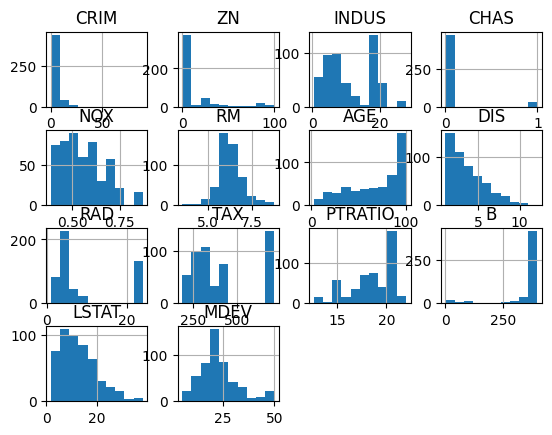

In [7]:
def print_histograms(boston_dataframe):
    boston_dataframe.hist()
    plt.title("Histograms")
    plt.show()

print_histograms(load_dataset())

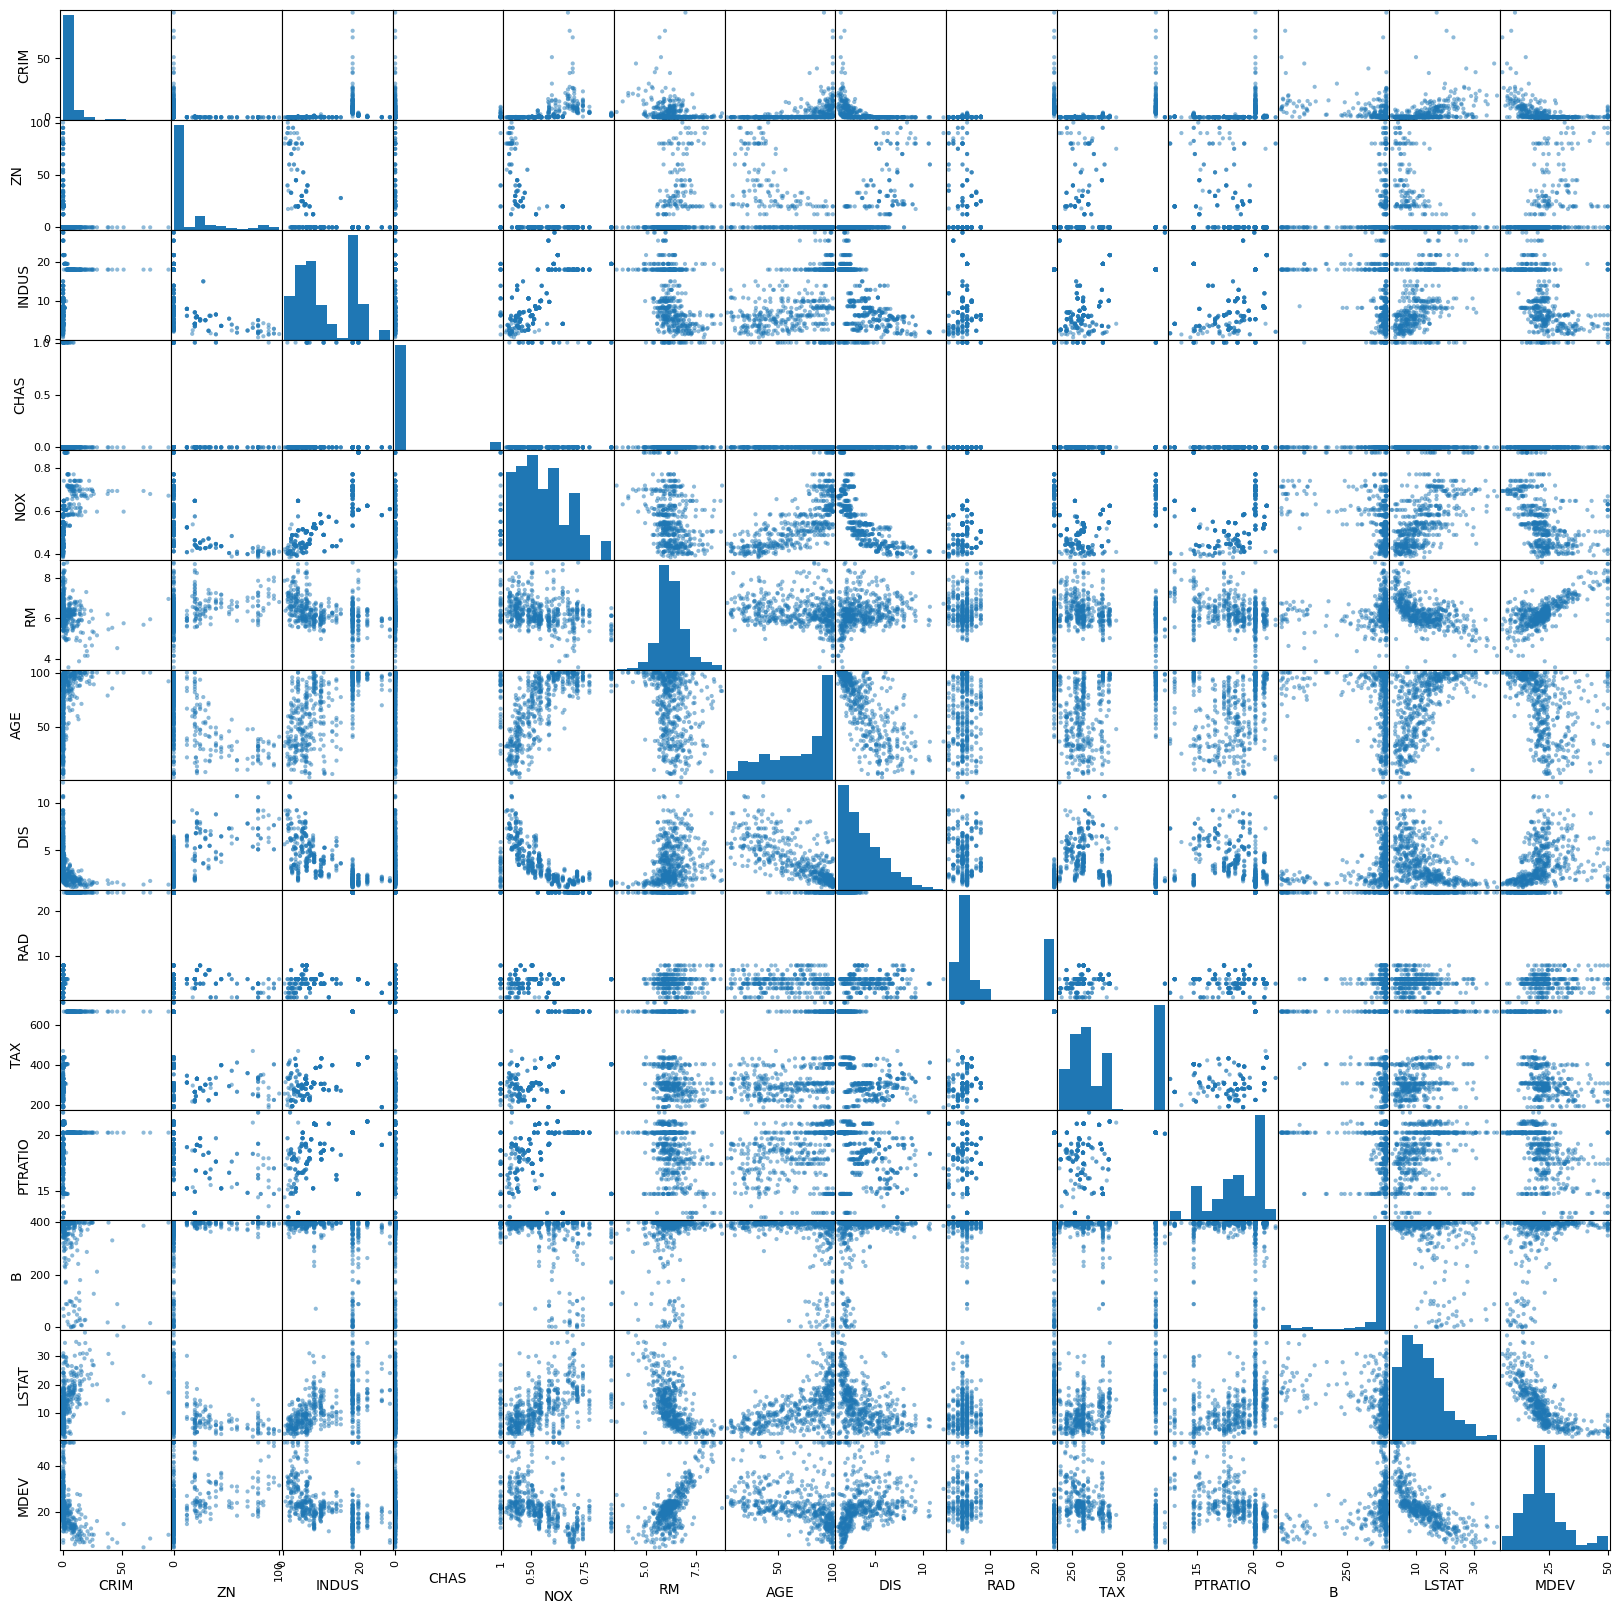

In [8]:
def print_scatter_matrix(boston_dataframe):
    pd.plotting.scatter_matrix(boston_dataframe, figsize=(20, 20))
    plt.show()

print_scatter_matrix(load_dataset())

In [9]:
def compute_correlations_matrix(data):
    return data.corr(method="pearson")

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


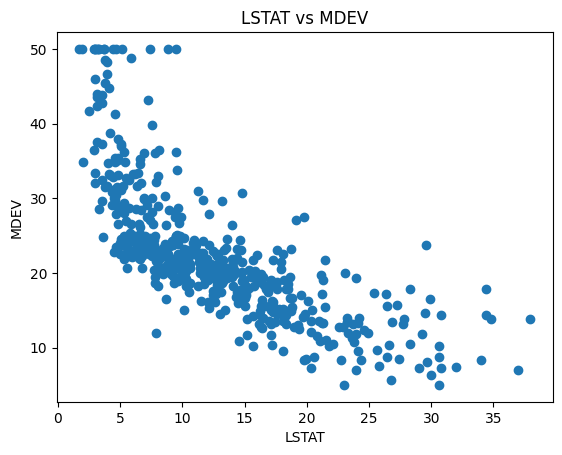

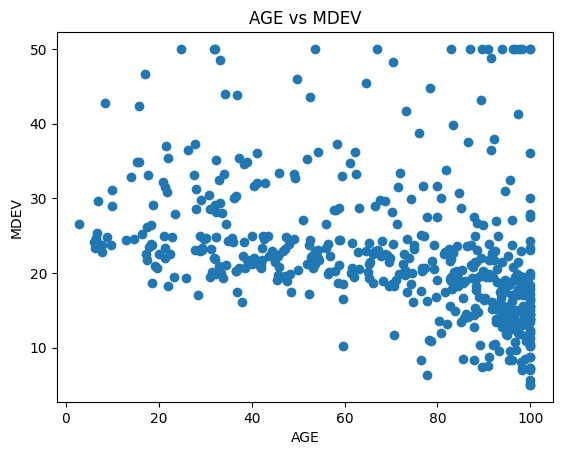

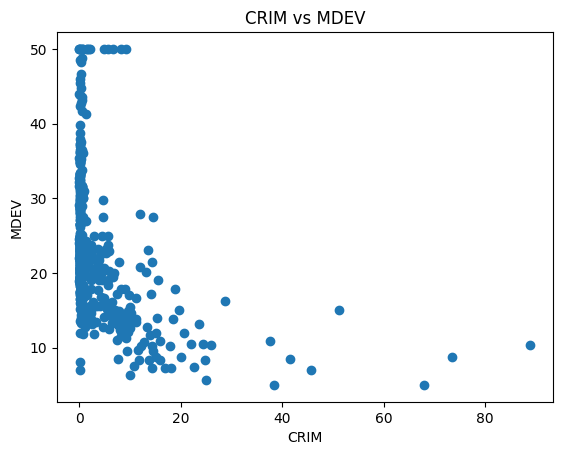

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
correlations = compute_correlations_matrix(load_dataset())
print(correlations["MDEV"])

df = load_dataset()
plt.scatter(df["LSTAT"], df["MDEV"])
plt.xlabel("LSTAT")
plt.ylabel("MDEV")
plt.title("LSTAT vs MDEV")
plt.show()

plt.scatter(df["AGE"], df["MDEV"])
plt.xlabel("AGE")
plt.ylabel("MDEV")
plt.title("AGE vs MDEV")
plt.show()

plt.scatter(df["CRIM"], df["MDEV"])
plt.xlabel("CRIM")
plt.ylabel("MDEV")
plt.title("CRIM vs MDEV")
plt.show()

target_variable = 'LSTAT'
clean_data = clean_dataset(df)
compute_correlations_matrix(clean_data)

In [12]:
def boston_fit_model(boston_dataframe):
    model_dataset = boston_dataframe[["RM", "MDEV"]]
    regressor = LinearRegression()
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    regressor.fit(x, y)
    return regressor

In [13]:
def boston_predict(estimator, data):
    predictions = estimator.predict(data)
    return predictions

In [14]:
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))



In [15]:
# Load dataset
df = load_dataset()

# Clean dataset
clean_data = clean_dataset(df)

# Fit the model
model = boston_fit_model(clean_data)

# Make predictions
predictions = boston_predict(model, clean_data[["RM"]])

# Run the evaluator
print_model_prediction_evaluator(clean_data["MDEV"], predictions)


Mean Absolute Error: 4.4477729015322325
Mean Squared Error: 43.60055177116956
Root Mean Squared Error: 6.603071389222561


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
#To predict for addition


# Load dataset
df = load_dataset()

# Clean dataset
clean_data = clean_dataset(df)

# Fit the model
model = boston_fit_model(clean_data)

# Make predictions
predictions = boston_predict(model, clean_data[["RM"]])

# Print actual vs predicted values
result_df = pd.DataFrame({
    'Actual': clean_data["MDEV"].values,
    'Predicted': predictions
})

print(result_df)


     Actual  Predicted
0      24.0  25.175746
1      21.6  23.774021
2      34.7  30.728032
3      33.4  29.025938
4      36.2  30.382152
..      ...        ...
501    22.4  25.339584
502    20.6  21.034286
503    23.9  28.825691
504    22.0  27.169108
505    11.9  20.215096

[506 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
